## Creating Histogram using one variable/column:

In [2]:
# list.files() # To know the list of files in the working directory
head(read.csv('pseudo_facebook.tsv', sep="\t"),3) 

head(read.delim('pseudo_facebook.tsv'),4) 

# read.delim() function defaults to the tab character as the separator between values 
# and the period as the decimal character. Run ?read.csv or ?read.delim in the console for more details.

df <- read.csv('pseudo_facebook.tsv', sep="\t")

# We can see there are lots of variables/columns, to get the names of the columns/variables
names(df)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0


userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0


[1] "userid"                "age"                   "dob_day"              
 [4] "dob_year"              "dob_month"             "gender"               
 [7] "tenure"                "friend_count"          "friendships_initiated"
[10] "likes"                 "likes_received"        "mobile_likes"         
[13] "mobile_likes_received" "www_likes"             "www_likes_received"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


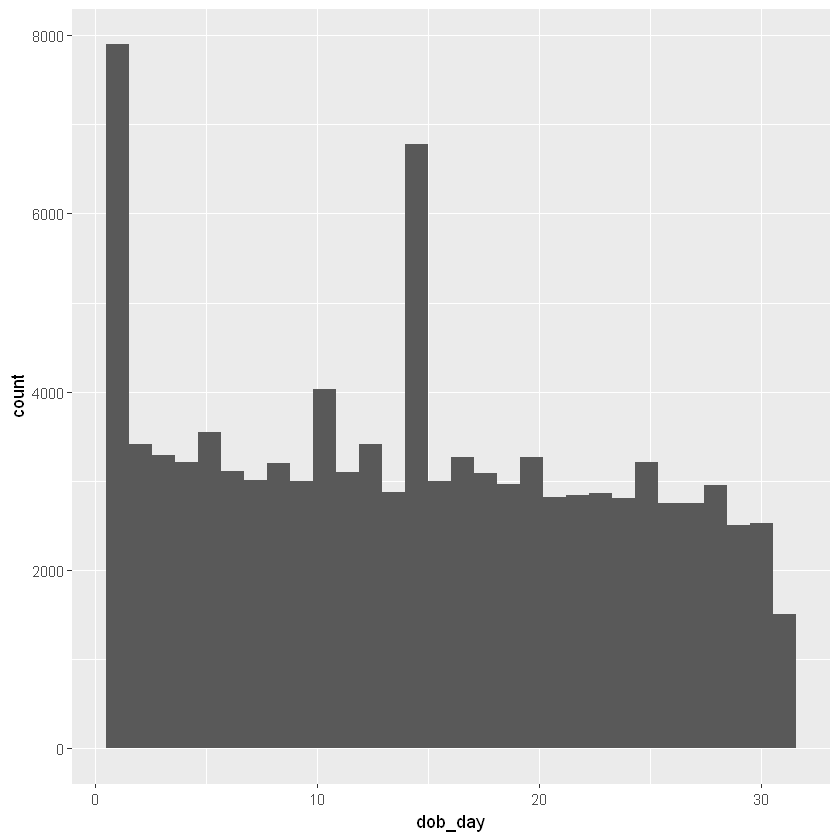

In [3]:
# Lets create a dob_day histogram to see how does the DOB of FB users vary
# Before that we'll have to import the ggplot2 library in our notebook
library(ggplot2)

qplot(data=df,x=dob_day)

## All the month days are well represented except for the 15th 
## Further it looks like,if users dont enter their DOB, system
## by default makes it 1st of the month

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


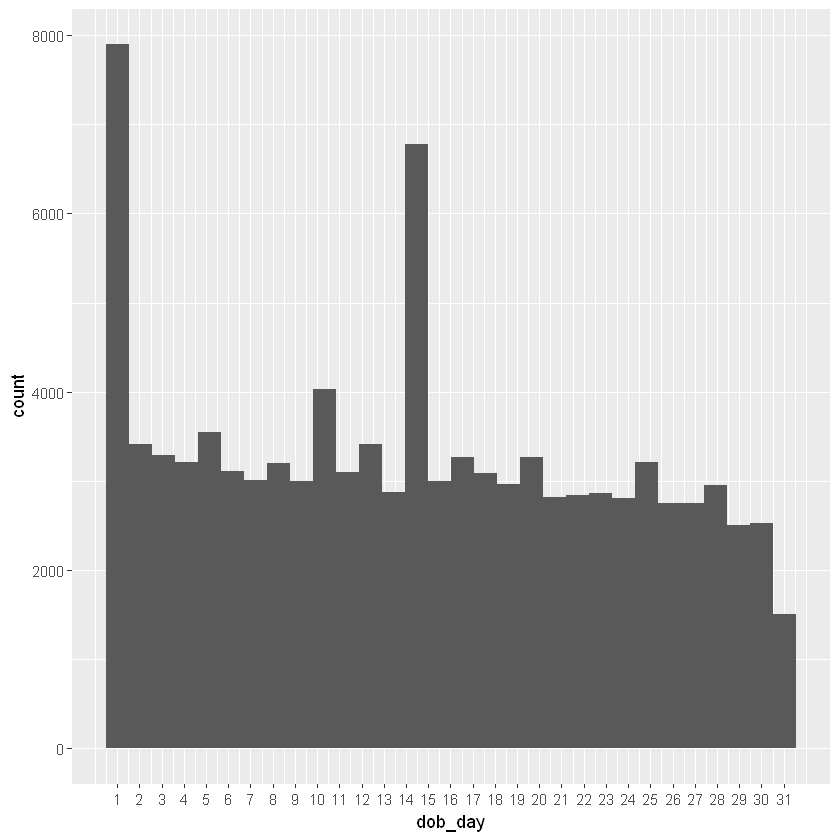

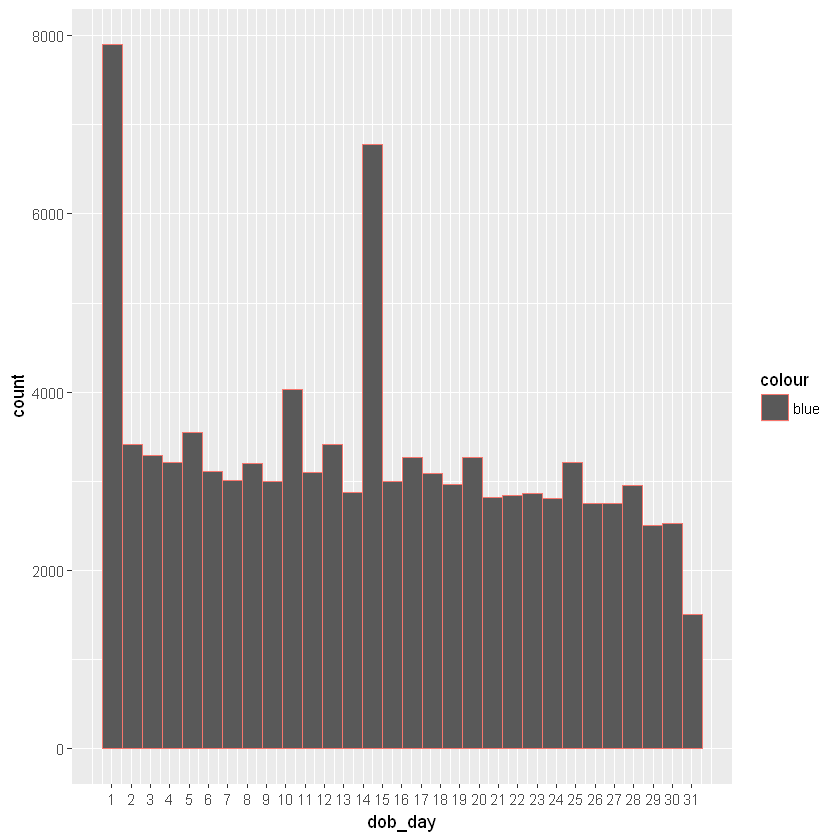

In [4]:
# Lets try something else

# In a recent change to ggplot2, all numeric data are considered continuous.
# We can choose to define the scale of the plot
# So, you have two options:

### 1:
# plot x as numeric, and use scale_x_continuous()

qplot(x=dob_day, data = df) + scale_x_continuous(breaks=1:31)

# For the continuous version, to see the boundaries between the bars, 
# you have to use the color argument:

# qplot(x=dob_day, data = pf, color='red') + scale_x_continuous(breaks=1:31)
# qplot() is for quick plotting, irrespective of the color borders will always be red.

qplot(x=dob_day, data=df, color='blue') + scale_x_continuous(breaks=1:31)


## In the plot above, we do get the boundaries b/n the bar colored
## but, the abberation for the 15th day of the month still persists



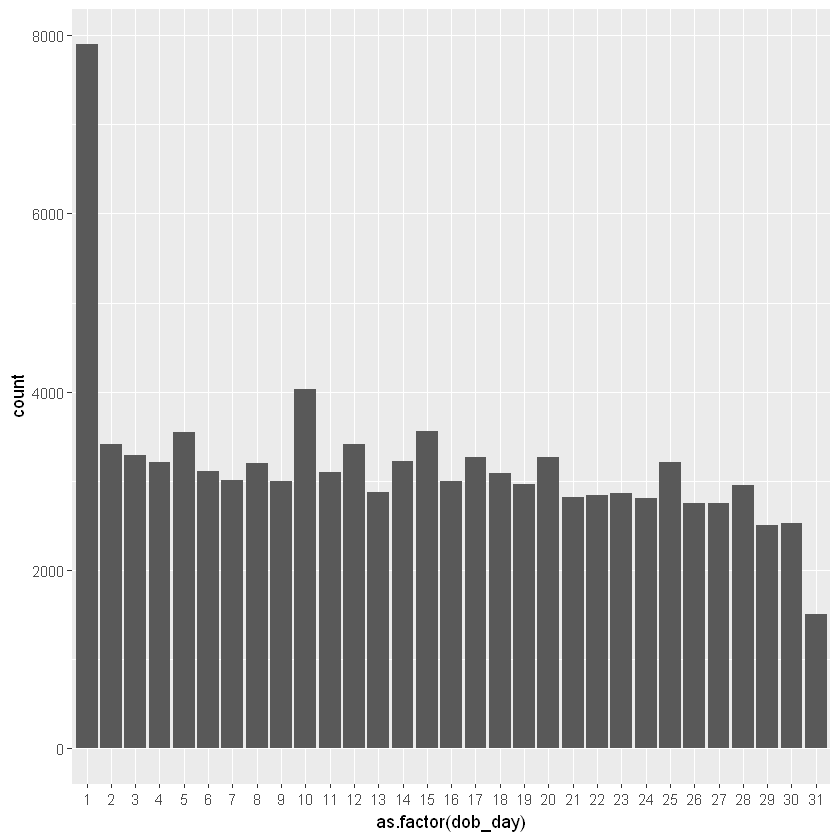

In [5]:
## 2:
## Now lets try to plot x as a discrete variable:

# plot x as a factor (i.e. a discrete variable) and use scale_x_discrete()
qplot(x=as.factor(dob_day), data = df) + scale_x_discrete()

## Now, we get the result we wanted

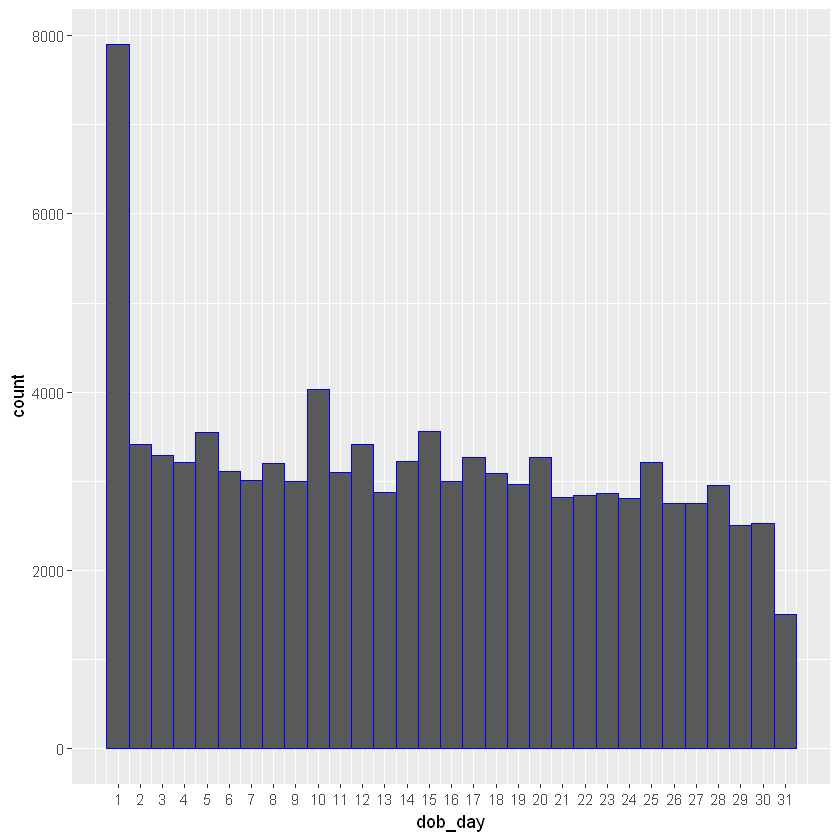

In [6]:
## Lets try to do the same using ggplot()

ggplot(aes(x=dob_day), data=df) + 
    geom_histogram(binwidth=1,color='blue') + 
        scale_x_continuous(breaks=1:31)

## Its working...Great! Even if we choose the x variable to be continuous

## Estimating the audience size:

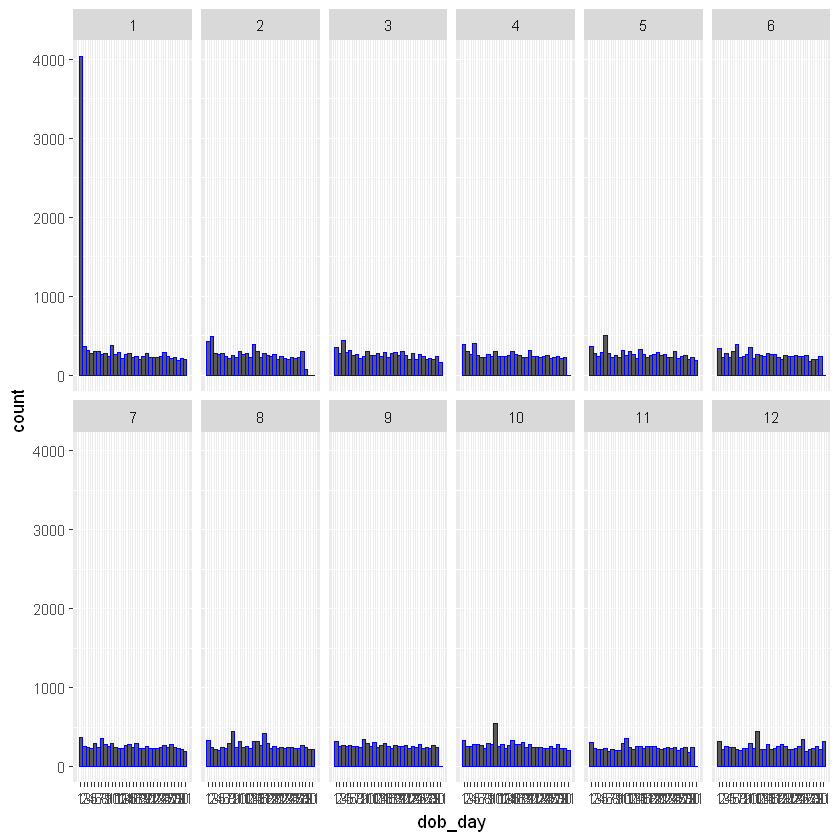

In [7]:
## Check whether people's perception of their audience on the FB matches
## the reality...who is actually seeing and sharing the content

## Lets plot DOB for each month:
## facet_wrap()
ggplot(data = df, aes(x = dob_day)) +
  geom_histogram(binwidth = 1, color='blue') +
      scale_x_continuous(breaks = 1:31) +
          facet_wrap(~dob_month, ncol=6)

# A very useful resource on the web:
## https://stackoverflow.com/questions/42265341/histogram-binwidth-inconsistency-between-base-graphics-and-ggplot2

## facet_wrap(formula)
#  facet_wrap(~ any_variable)

## To pass more than one variable
## facet_grid(formula)
## facet_grid(vertical ~ horizontal)

### Detecting and dealing with the outliers:
- sometimes it might be an anomaly or error,
- while, it may also be the actual data points

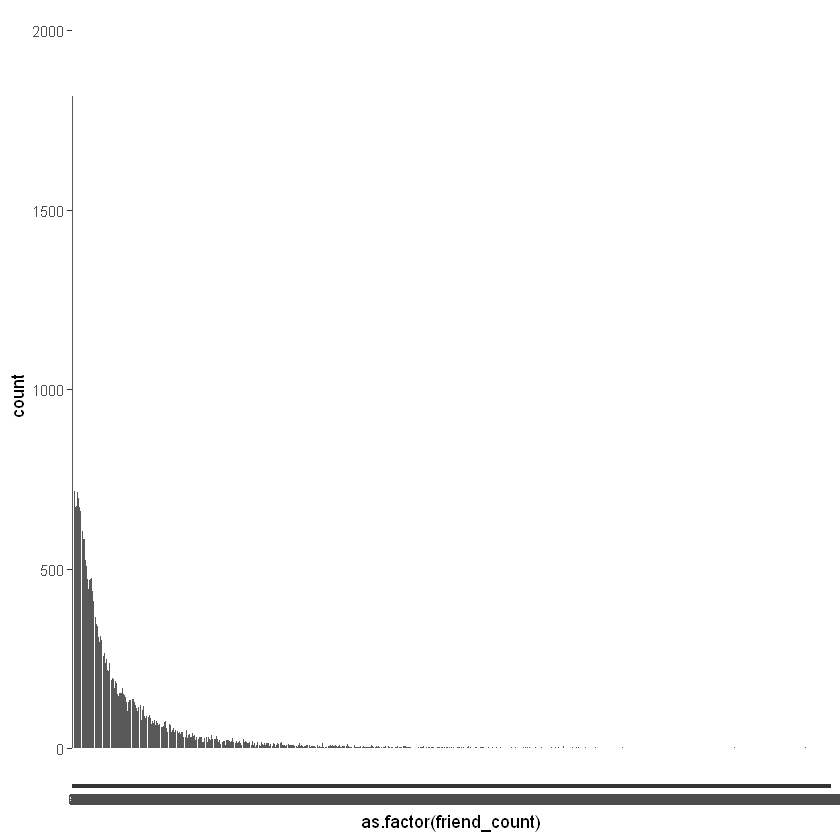

In [8]:
# Adjust the axis to have a better look at the data:
qplot(x=as.factor(friend_count), data = df) + scale_x_discrete()
# qplot(x=friend_count, data = df) + scale_x_discrete()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


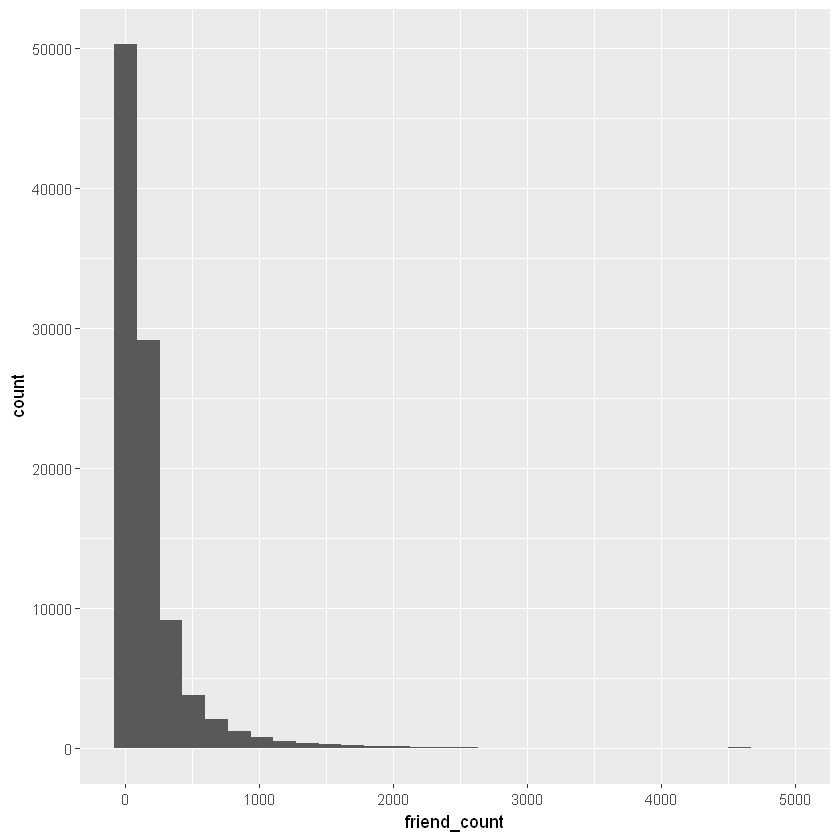

In [9]:
qplot(x=friend_count, data = df) 

# As we can see this is a long tail data, as most users have friends around 500.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."

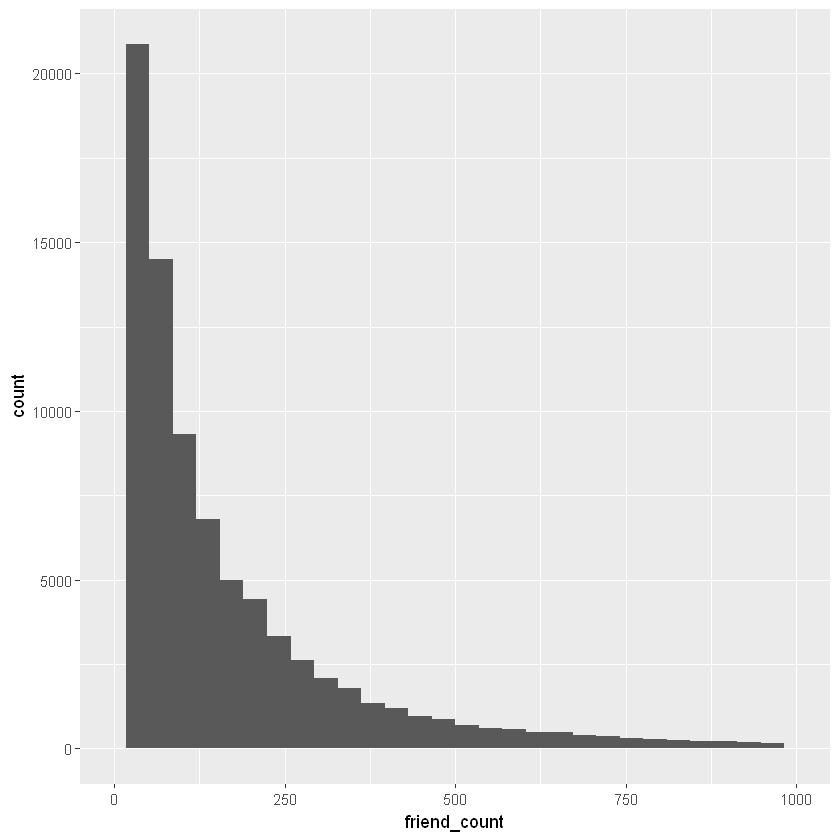

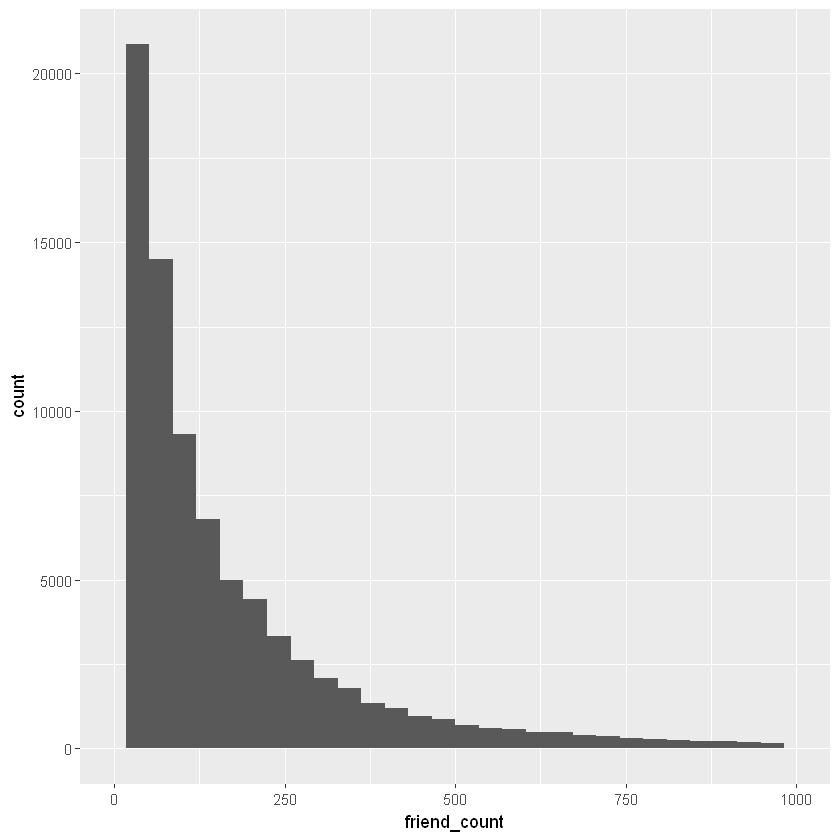

In [10]:
## Limit the axis

## Lets examine the data along the tail, users w/ friends >1000
qplot(x=friend_count, data = df , xlim = c(0,1000))

## Another way is to add a layer

qplot(x=friend_count, data = df) +
    scale_x_continuous(limits = c(0, 1000))

# qplot(x=friend_count, data = df, color = 'white') +
#     scale_x_discrete(limits = c(0, 1000))



Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."

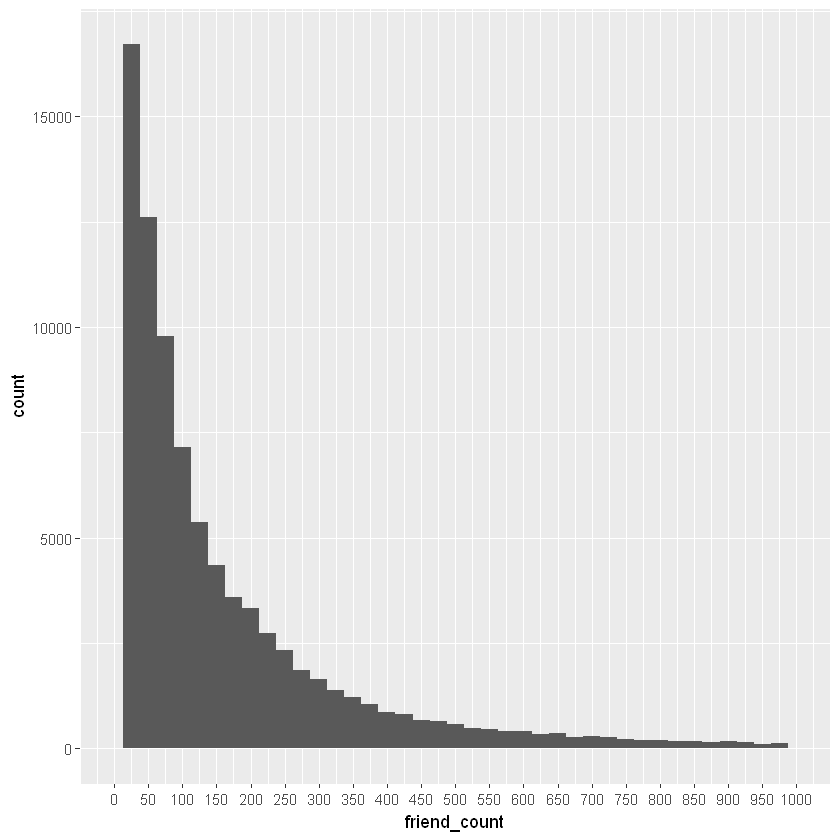

In [11]:
## Adjusting the bin width

qplot(x=friend_count, data = df, binwidth=25) +
    scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50)) 

Warning message:
"Removed 2951 rows containing non-finite values (stat_bin)."

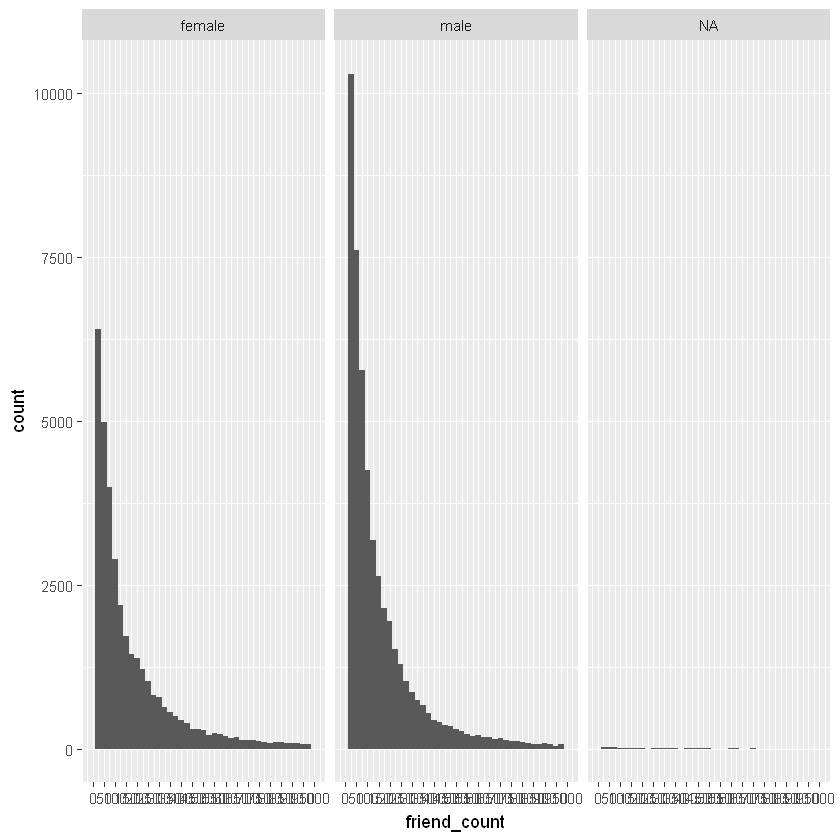

In [12]:
## Lets split the data for male and female using facet

qplot(x=friend_count, data = df, binwidth=25) +
    scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50)) +
        facet_wrap(~gender)


Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."

Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."

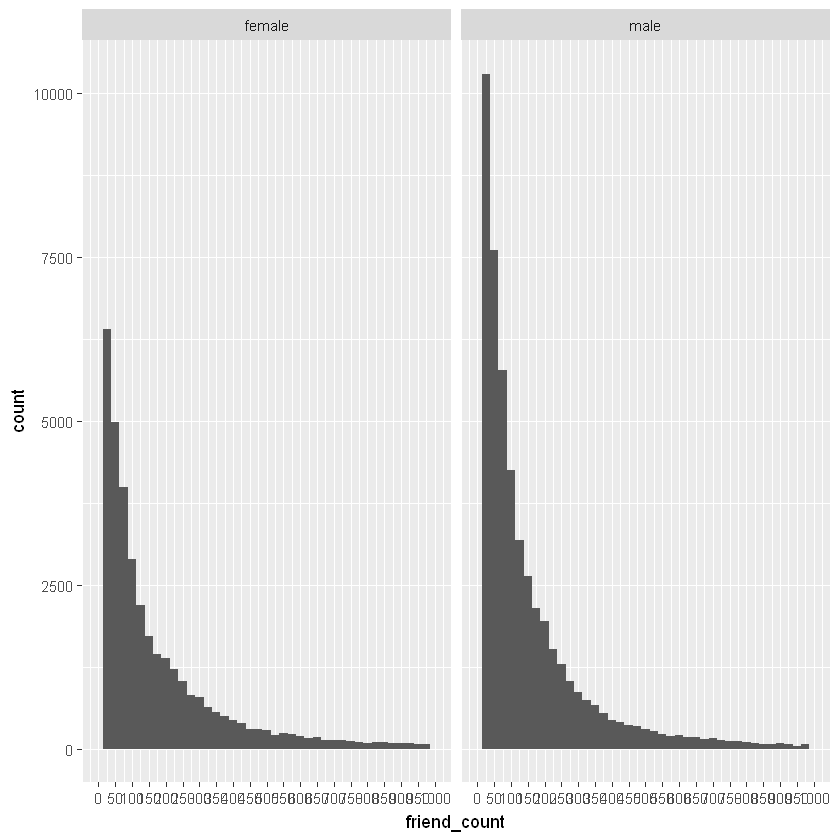

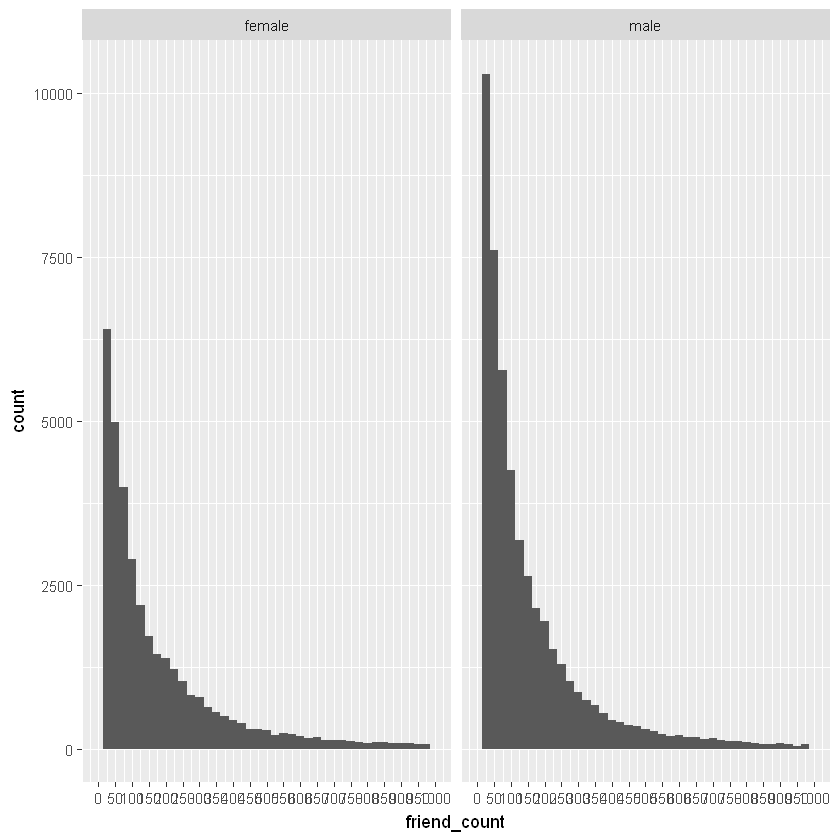

In [13]:
## Omitting NA observations:

## Omit NA values for gender
qplot(x=friend_count, data = subset(df, !is.na(gender)), binwidth=25) +
    scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50)) +
        facet_wrap(~gender)

## Omit all NA values...CAUTION!
qplot(x=friend_count, data = na.omit(df), binwidth=25) +
    scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50)) +
        facet_wrap(~gender)


In [14]:
## Still it is hard to determine, which gender has more friends on an average

table(df$gender)


female   male 
 40254  58574 

In [15]:
## How to get average friend count by gender

by(df$friend_count, df$gender, summary)

## Voila! despite, males are larger in number, they have fewer friends on an average

## Why would median be a better measure than mean
# Bcoz, it is unaffected by the outlier.

df$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
df$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

Warning message:
"Removed 26 rows containing non-finite values (stat_bin)."

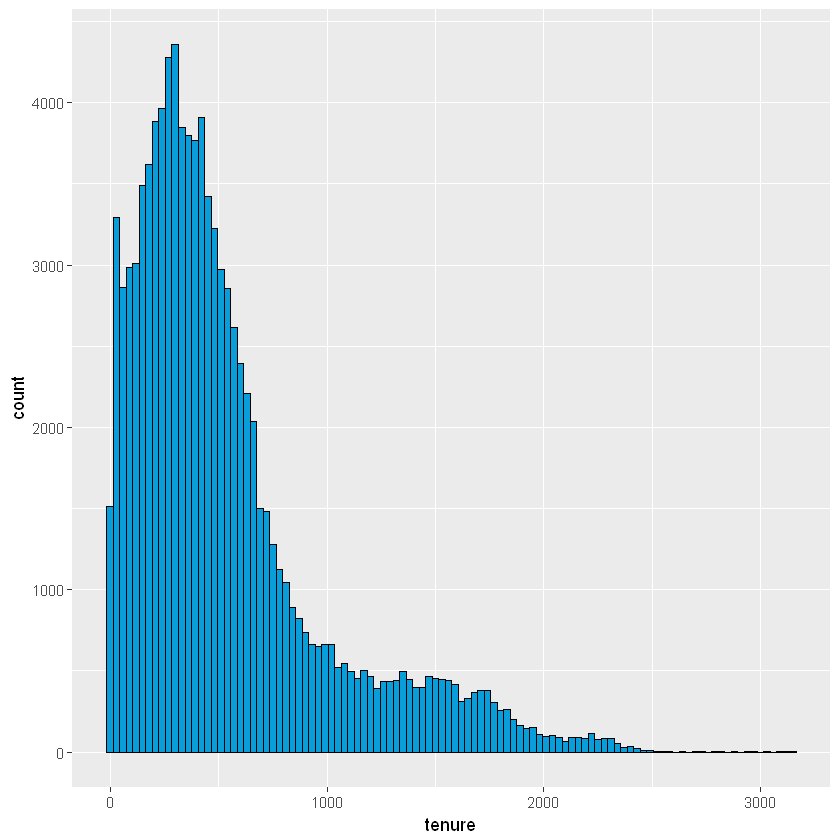

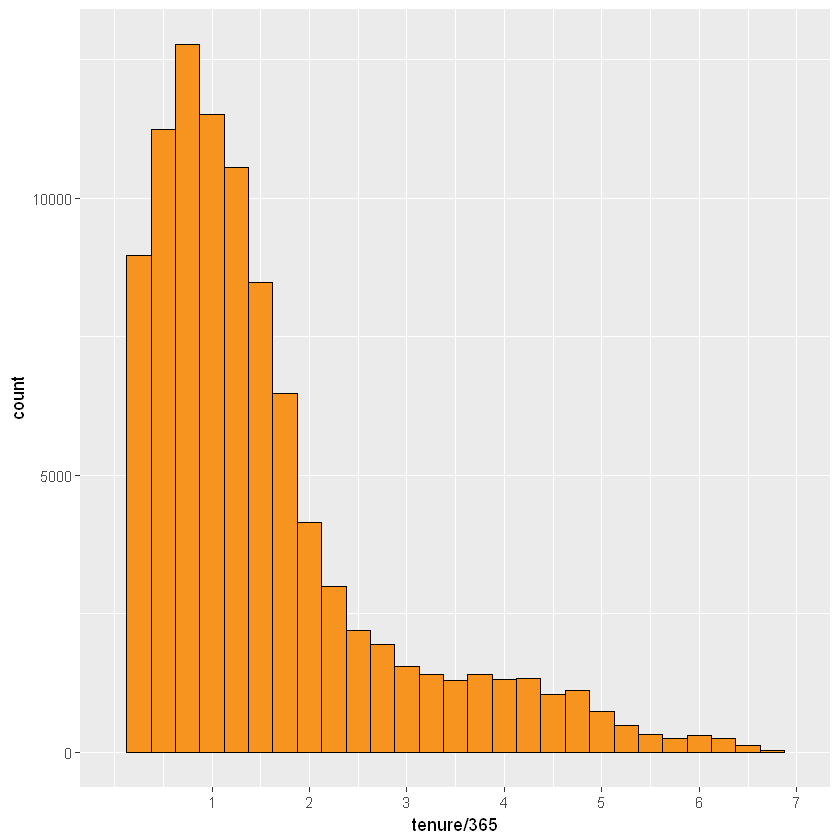

In [16]:
## Next question, for how many days someone has been using FB

# The parameter color determines the color outline of objects in a plot.
# The parameter fill determines the color of the area inside objects in a plot.
# How the color black and the hex code color of #099DD9 (a shade of blue) are wrapped inside of I(). 
# The I() functions stand for 'as is' and tells qplot to use them as colors.

# Things we can adjust in a plot by reading the ggplot theme documentation
#     http://ggplot2.tidyverse.org/reference/theme.html
    
qplot(x=tenure, data = df, binwidth=30,
    color=I('black'), fill=I('#099DD9'))

qplot(x=tenure/365, data = df, binwidth=0.25,
    color=I('black'), fill=I('#F79420')) +
        scale_x_continuous(breaks=seq(1,7,1), limits=c(0,7))

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

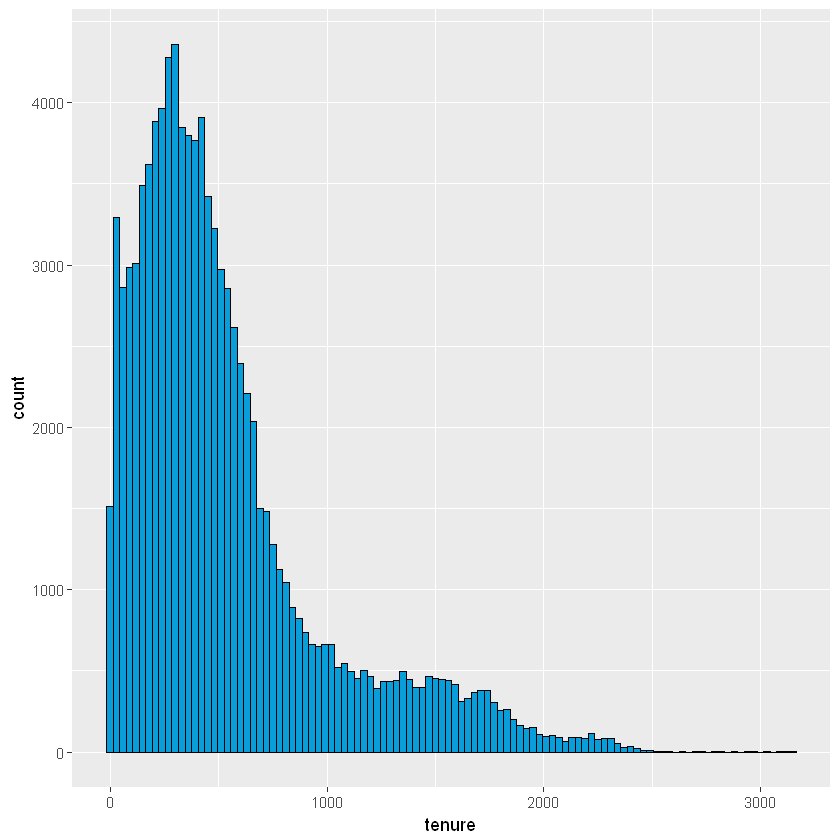

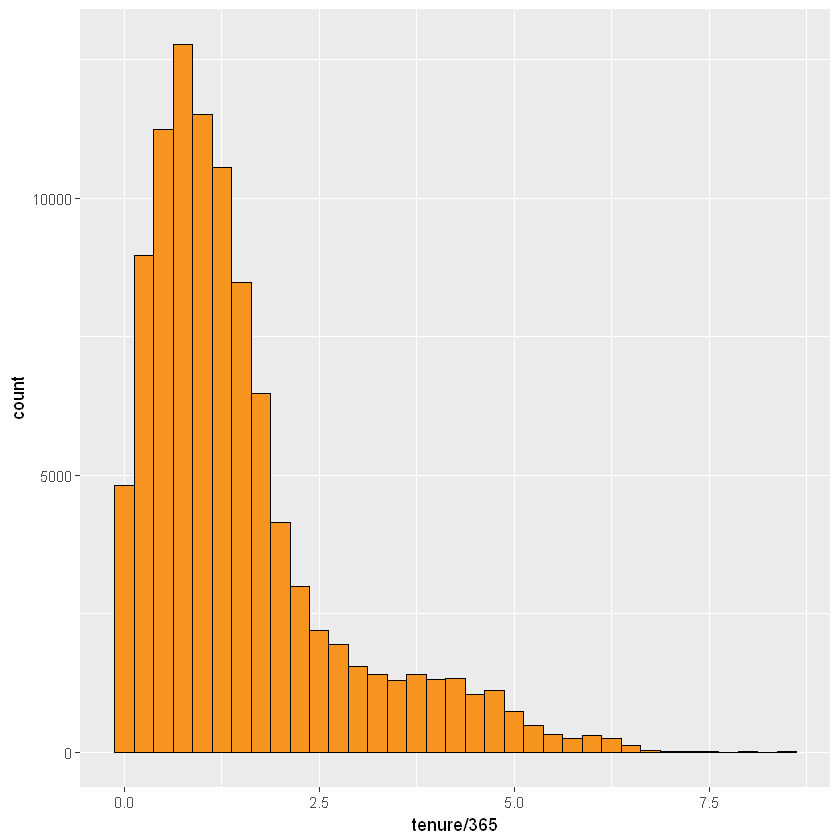

In [17]:
ggplot(aes(x = tenure), data = df) +
  geom_histogram(binwidth = 30, color = 'black', fill = '#099DD9')

ggplot(aes(x = tenure/365), data = df) +
  geom_histogram(binwidth = .25, color = 'black', fill = '#F79420')


Warning message:
"Removed 26 rows containing non-finite values (stat_bin)."

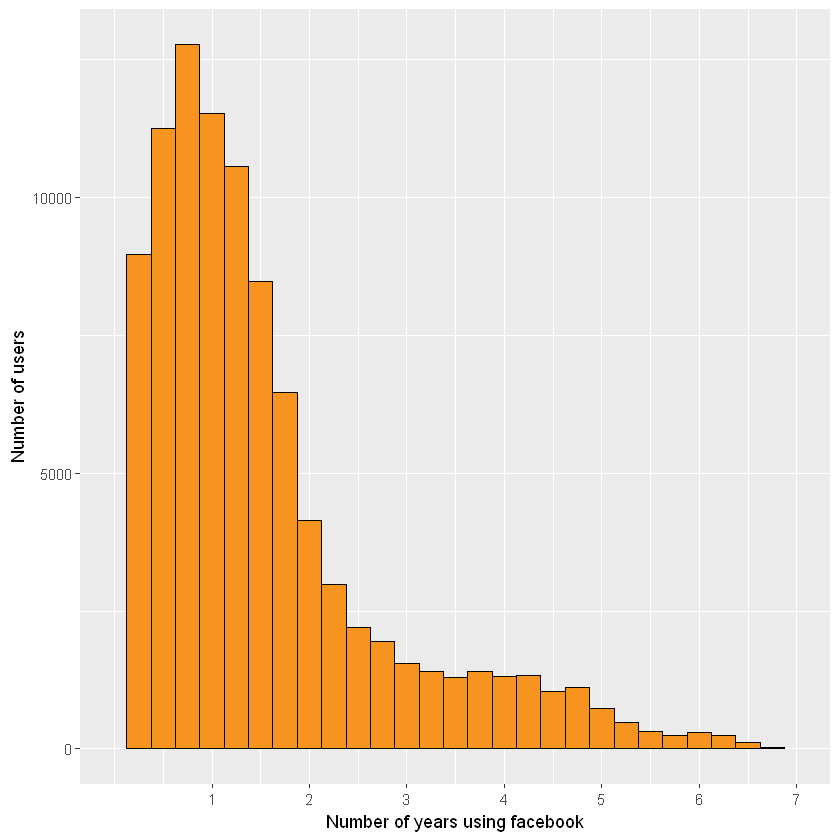

In [18]:
## Labels:

qplot(x=tenure/365, data = df, binwidth=0.25,
    xlab='Number of years using facebook',
    ylab='Number of users',
    color=I('black'), fill=I('#F79420')) +
        scale_x_continuous(breaks=seq(1,7,1), limits=c(0,7))



Warning message:
"Removed 3687 rows containing non-finite values (stat_bin)."

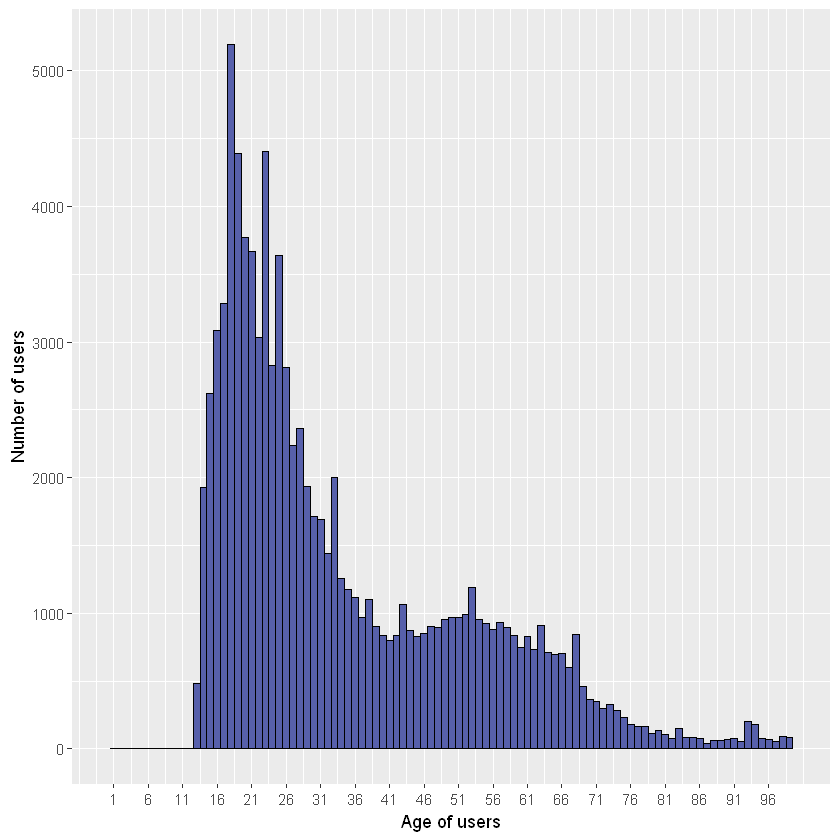

In [19]:
## User ages:

qplot(x=age, data = df, binwidth=1,
    xlab='Age of users',
    ylab='Number of users',
    color=I('black'), fill=I('#5760AB')) +
        scale_x_continuous(breaks=seq(1,100,5), limits=c(0,100))


In [20]:
## Transforming data

# Most of the engagement variables like friends count, likes, comments, share etcetera
# have very long tails. Some users have 10 or even 100 times the median value
# In stats, we say that the data is over-dispersed and it helps to transform these
# values so we can see the deviations and shorten the tail 
# Eg...friend-count histogram with the long tail, we can take log or square roots
# doing so will help us see the patterns more clearly without being distracted by tail

# Many statistical technique like linear regressions are based on the assumption
# that variables have normal distribution, so by taking log of this variable,
# we can transform our data in a maybe normal or something that closely resembles 
# a normal distribution

summary(df$friend_count)

summary(log10(df$friend_count)) 

# Intresting min=-inf, mean=-inf, bcoz some users might have 0 friends and log(0) is inf
# To avoid that we can add 1 to all the friend_count

summary(log10(df$friend_count + 1)) 

summary(sqrt(df$friend_count)) 

# We can create the histogram of transformed variables 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    31.0    82.0   196.4   206.0  4923.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -Inf   1.491   1.914    -Inf   2.314   3.692 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.505   1.919   1.868   2.316   3.692 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.568   9.055  11.088  14.353  70.164 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


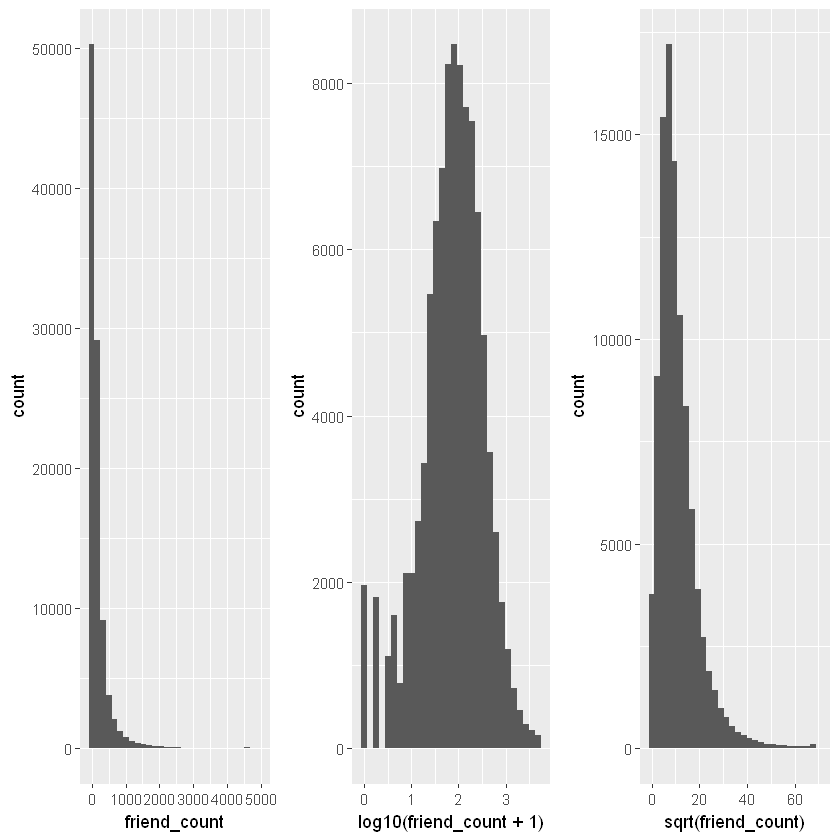

In [22]:
## How to create multiple graphs on one page
# (r_env) C:\Users\rkuma>conda install -c r r-gridextra
# http://lightonphiri.org/blog/ggplot2-multiple-plots-in-one-graph-using-gridextra

library(gridExtra)

p1 = qplot(x=friend_count, data = df)
p2 = qplot(x=log10(friend_count + 1), data = df)
p3 = qplot(x=sqrt(friend_count), data = df)

grid.arrange(p1, p2, p3, ncol=3) # we can set ncol as we want

# 2nd plot is the best; kind of normalish, 3rd is not bad either; smaller tail


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1962 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


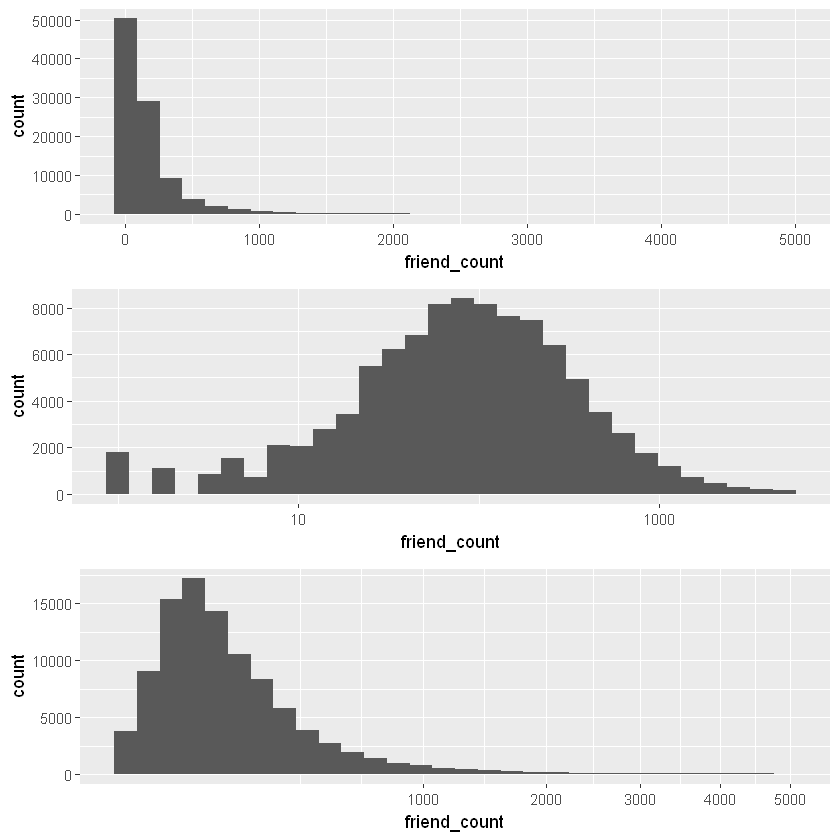

In [23]:
## Using ggplot

p1 = ggplot(aes(x = friend_count), data = df) + geom_histogram()
p2 = p1 + scale_x_log10()
p3 = p1 + scale_x_sqrt()

grid.arrange(p1, p2, p3, ncol=1)

Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

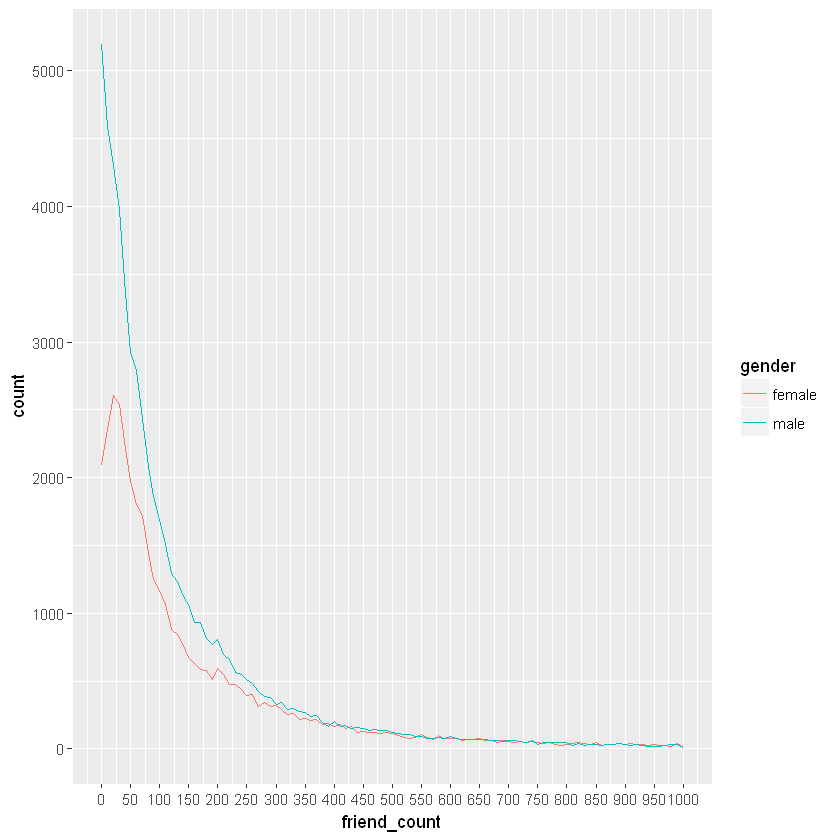

In [26]:
## Frequency polygon:

# Good for comparing two or more distributions in a single frame:

qplot(x=friend_count, data = subset(df, !is.na(gender)), binwidth=10, geom = 'freqpoly', color = gender) +
    scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50)) 
        


Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."Warning message:
"Removed 4 rows containing missing values (geom_path)."

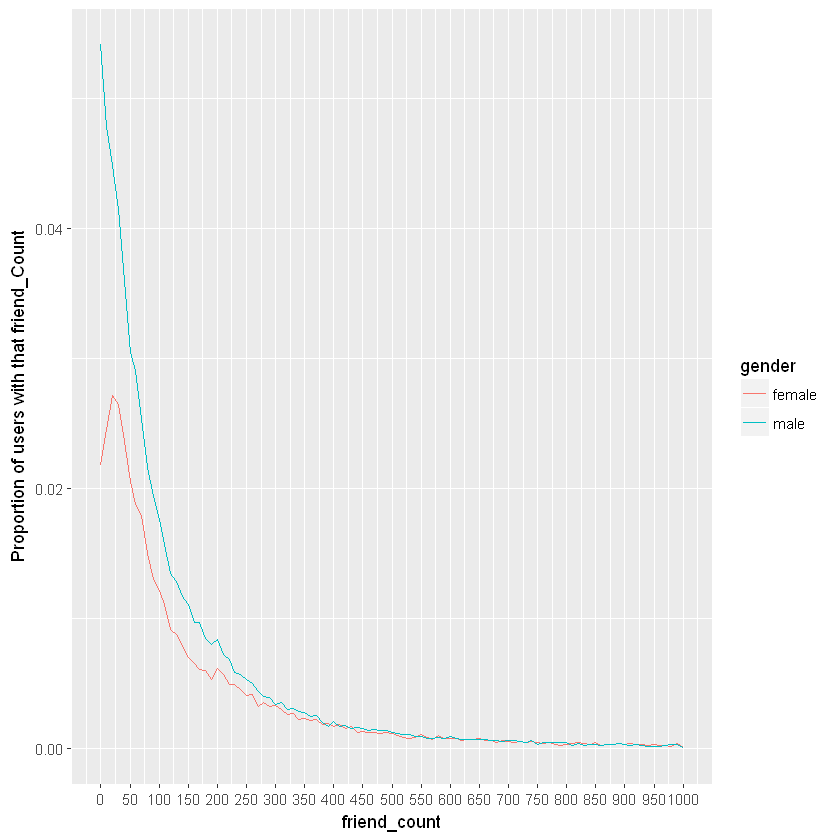

In [31]:
## The plot above doesn't aswer our question that which one of the two have 
## more friends on an avg, so change the y axis: from count to proportion

qplot(x=friend_count, y= ..count../sum(..count..),
      data = subset(df, !is.na(gender)), binwidth=10,
      xlab = 'friend_count', ylab = 'Proportion of users with that friend_Count',
      geom = 'freqpoly', color = gender) +
      scale_x_continuous(limits = c(0, 1000) , breaks=seq(0,1000,50))





`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


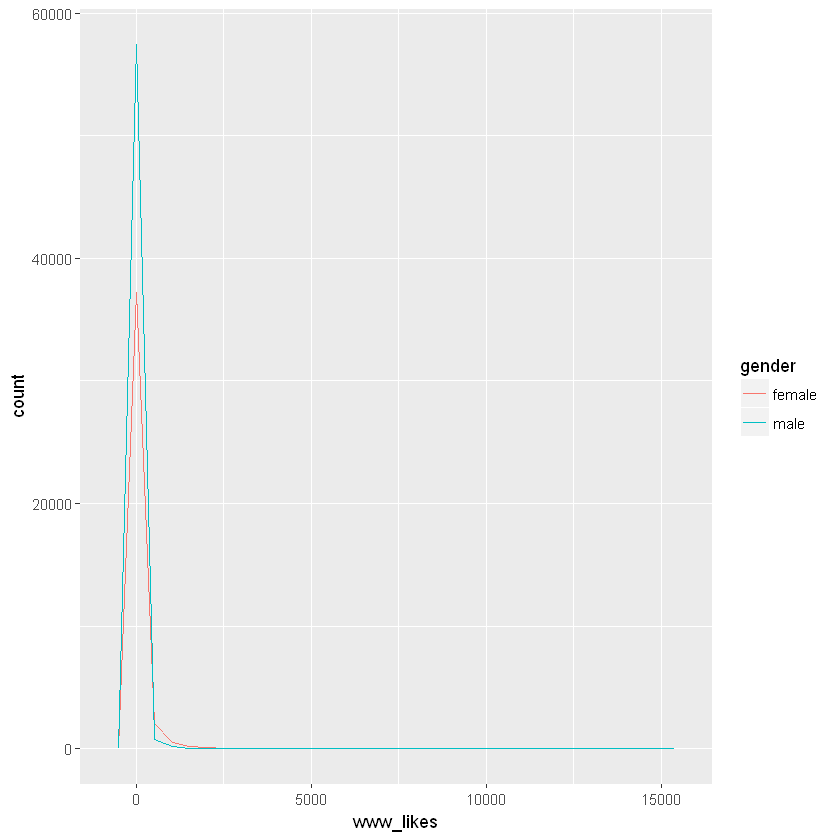

In [44]:
## Which gender makes more www_likes

qplot(x=www_likes, 
      data = subset(df, !is.na(gender)),
      
      geom = 'freqpoly', color = gender) +
    scale_x_continuous() 

## It doesn't reveal much, take log10

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
"Transformation introduced infinite values in continuous x-axis"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 60935 rows containing non-finite values (stat_bin)."

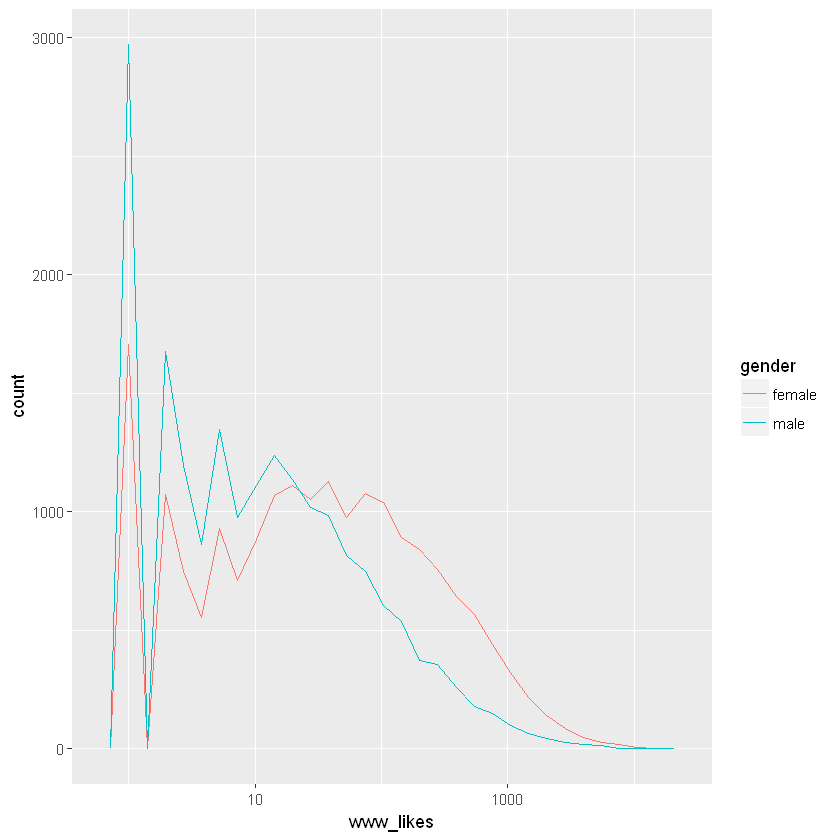

In [42]:
qplot(x= www_likes, 
      data = subset(df, !is.na(gender)),
      
      geom = 'freqpoly', color = gender) +
    scale_x_continuous() +
    scale_x_log10()


## It looks like women overtake men at certain point of time.

In [46]:
by(df$www_likes, df$gender, summary)

by(df$www_likes, df$gender, sum)



df$gender: female
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     0.00     0.00    87.14    25.00 14865.00 
------------------------------------------------------------ 
df$gender: male
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     0.00     0.00    24.42     2.00 12903.00 

df$gender: female
[1] 3507665
------------------------------------------------------------ 
df$gender: male
[1] 1430175

### Box plots:

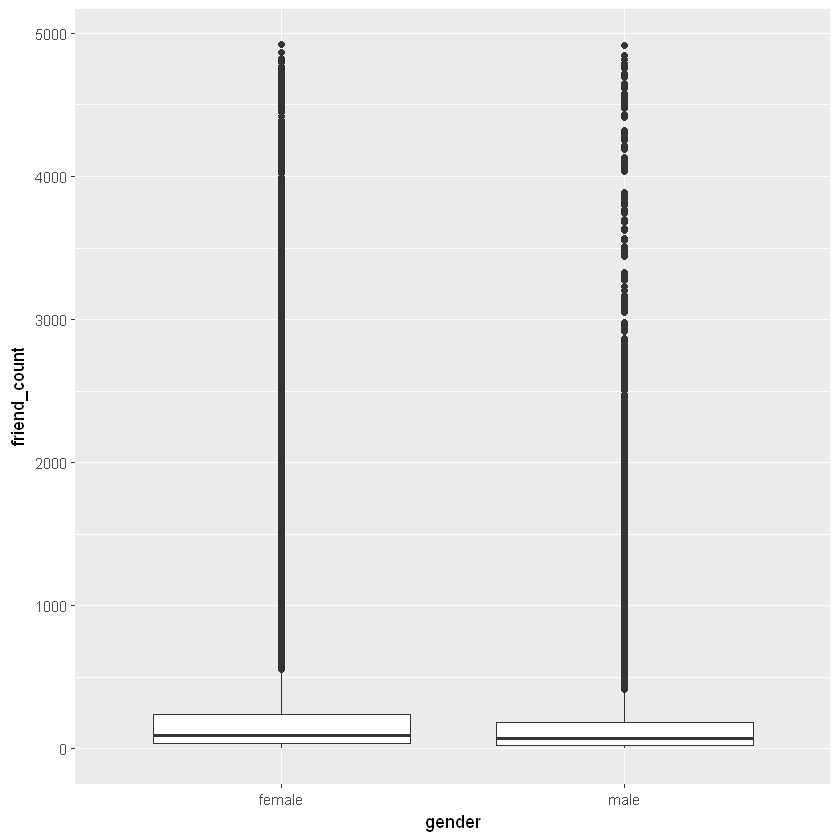

In [47]:
qplot(x= gender, y = friend_count,
      data = subset(df, !is.na(gender)),
      geom = 'boxplot')

## Lots of outliers, boxes are too tiny

Warning message:
"Removed 2949 rows containing non-finite values (stat_boxplot)."

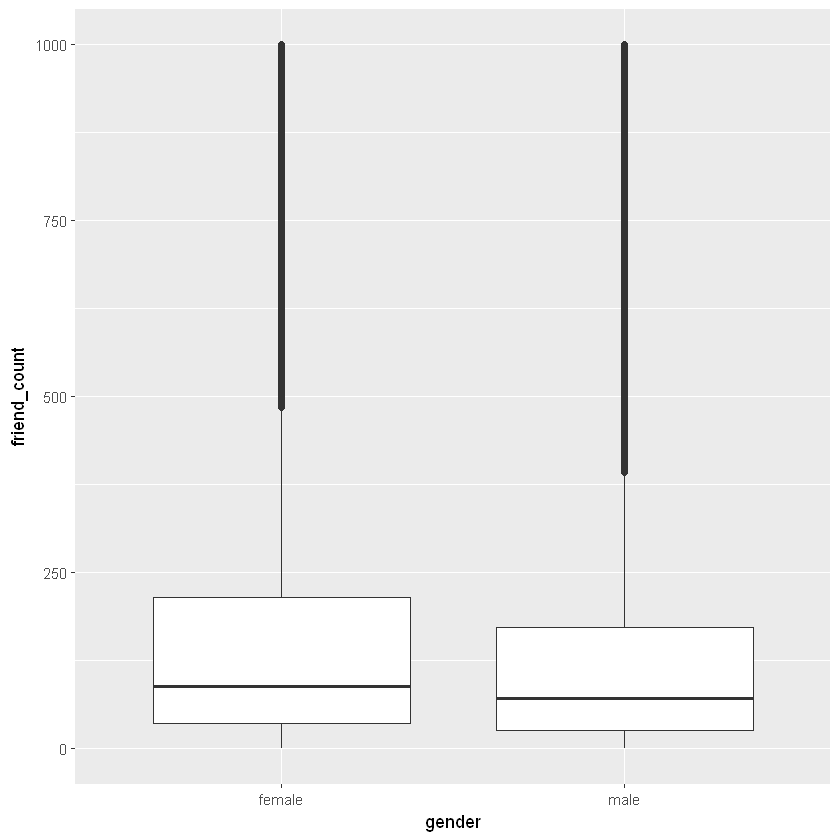

In [51]:
qplot(x= gender, y = friend_count,
      data = subset(df, !is.na(gender)),
      geom = 'boxplot') +
      scale_y_continuous(limits = c(0,1000))

## This might not be correct as we have removed certain data points

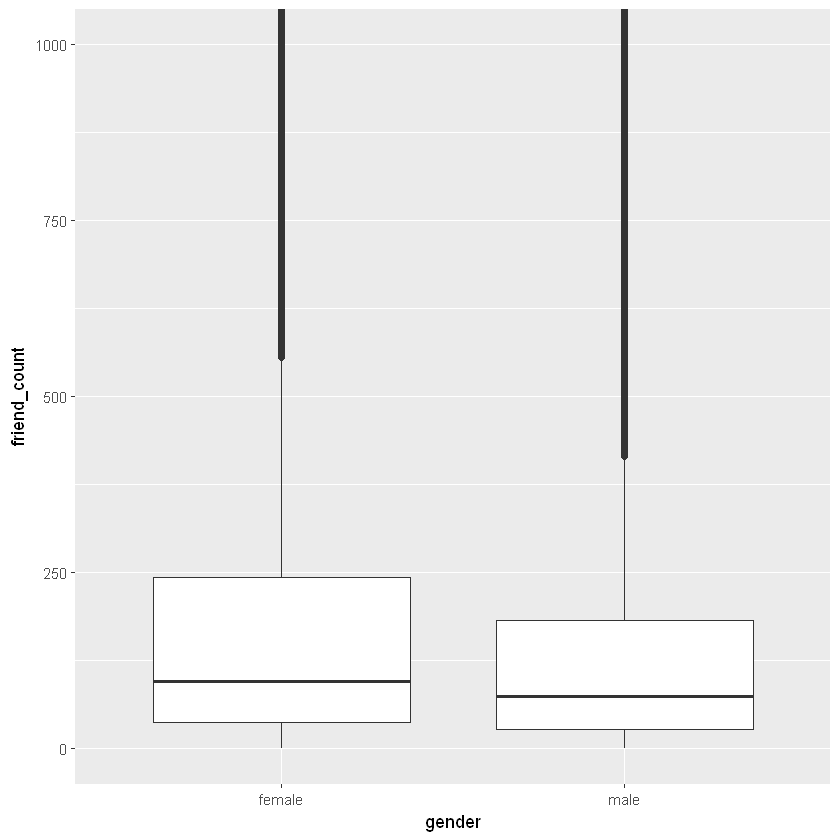

In [52]:
qplot(x= gender, y = friend_count,
      data = subset(df, !is.na(gender)),
      geom = 'boxplot') +
      coord_cartesian(ylim = c(0,1000))

## Notice the diff, here we have not removed any data point.

df$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
df$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

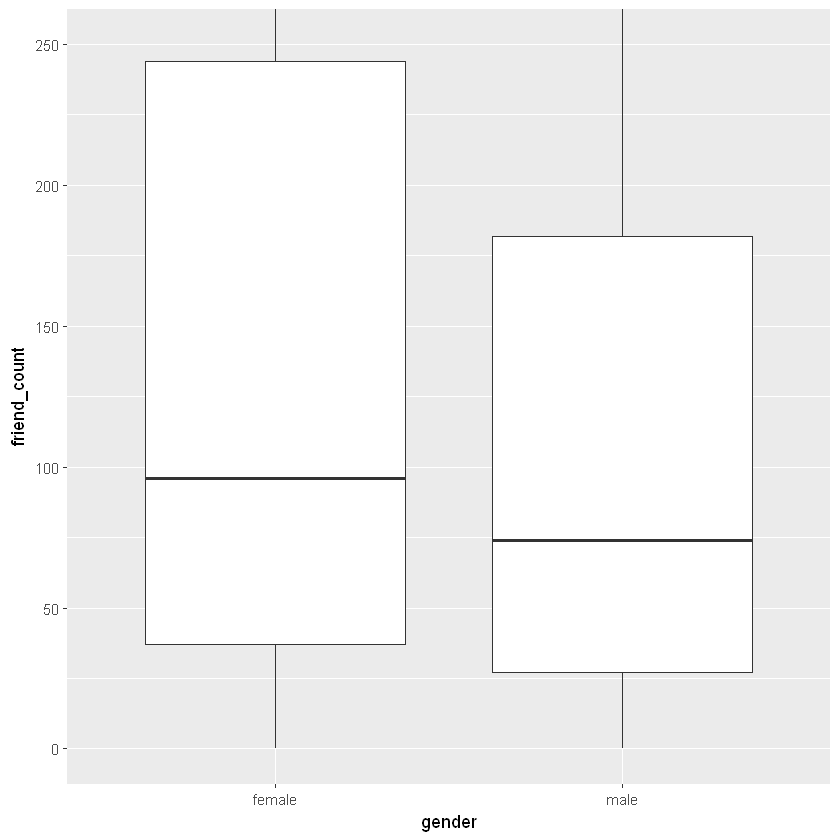

In [53]:
## Lets have a closer look at quartiles:

by(df$friend_count, df$gender, summary)

qplot(x= gender, y = friend_count,
      data = subset(df, !is.na(gender)),
      geom = 'boxplot') +
      coord_cartesian(ylim = c(0,250))


In [54]:
## On an average, who initiated more friendship, men or women:

by(df$friendships_initiated, df$gender, summary)

df$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    19.0    49.0   113.9   124.8  3654.0 
------------------------------------------------------------ 
df$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    15.0    44.0   103.1   111.0  4144.0 

In [61]:
## Other ways of transforming variables than log and square root:
## eg... binary

summary(df$mobile_likes)
# median is zero, that means we have lots of zeroes..

# Making it a logical variable
summary(df$mobile_likes >0)

# Create a new variable in the data frame with NA values.
df$mobile_check_in <- NA

df$mobile_check_in = ifelse(df$mobile_likes >0, 1, 0)
df$mobile_check_in = factor(df$mobile_check_in)
summary(df$mobile_check_in)

### What percentage of chekin use mobile?

sum(df$mobile_check_in == 1)/length(df$mobile_check_in)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     4.0   106.1    46.0 25111.0 

   Mode   FALSE    TRUE 
logical   35056   63947 

0     1 
35056 63947

[1] 0.6459097

# Problem sets in one variable:

In [4]:
# diamonds datasets come with ggplot package, so we'll have to load 
# ggplot first

library(ggplot2)

data(diamonds)

head(diamonds, 4)
str(diamonds)
summary(diamonds)
dim(diamonds)
nrow(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63


Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

[1] 53940    10

[1] 53940

In [13]:
# What color represent the best color for the diamonds

?diamonds # Has the answer\
# We know that color variable is an (ordered) categorical variable
# with 7 levels, but we dont know it is an inc or decr order
# so refer ?diamonds#

In [16]:
mean(diamonds$price)
median(diamonds$price)

[1] 3932.8

[1] 2401

In [25]:
## Cost of diamonds < $250, < $500, >=$1500?

t = diamonds$price
t1 = t[t<250]
length(t1)
t2 = t[t<500]
length(t2)
t3 = t[t>=15000]
length(t3)

[1] 0

[1] 1729

[1] 1656

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


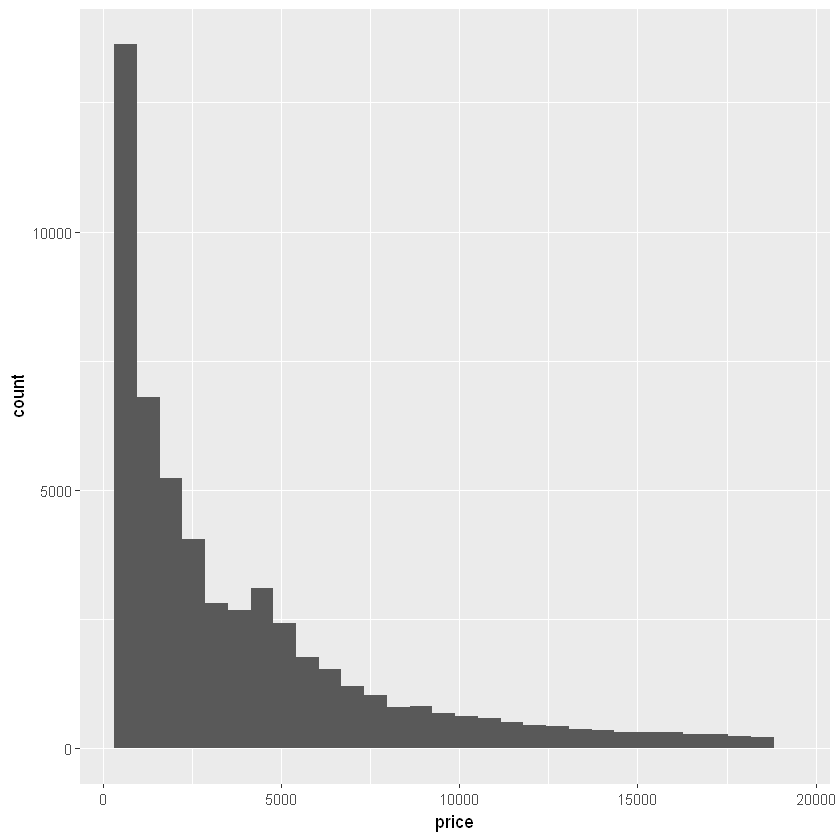

In [26]:
# Explore the largest peak in the price histogram you created earlier.

# Try limiting the x-axis, altering the bin width,
# and setting different breaks on the x-axis.

# You can save images by using the ggsave() command.
# ggsave() will save the last plot created.
# For example...
#                  qplot(x = price, data = diamonds)
#                  ggsave('priceHistogram.png')

## Create histpgram of prices of diamonds
qplot(data=diamonds, x=price)

Warning message:
"Removed 35659 rows containing non-finite values (stat_bin)."

Saving 6.67 x 6.67 in image
Warning message:
"Removed 35659 rows containing non-finite values (stat_bin)."

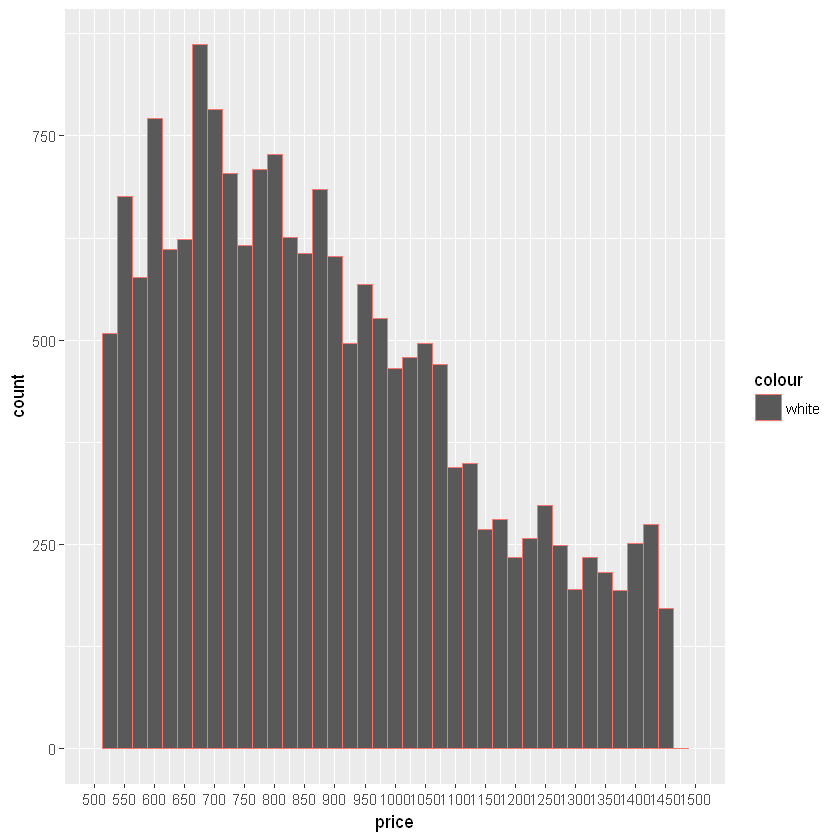

In [31]:
qplot(data=diamonds, x=price, binwidth = 25, color='white') +
    scale_x_continuous(limits = c(500, 1500), breaks = seq(500, 1500, 50))

ggsave('priceHistogram.png')

Warning message:
"Removed 35659 rows containing non-finite values (stat_bin)."

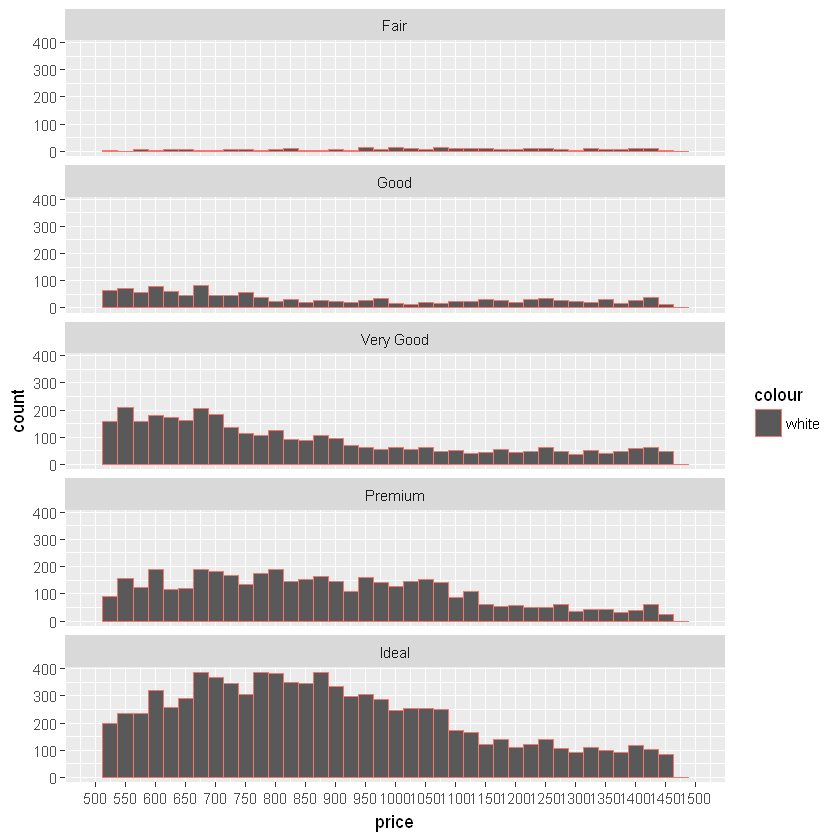

In [33]:
# Break out the histogram of diamond prices by cut.
qplot(data=diamonds, x=price, binwidth = 25, color='white') +
    scale_x_continuous(limits = c(500, 1500), breaks = seq(500, 1500, 50))+
        facet_wrap(~cut, ncol=1)

In [47]:
# Which cut has the highest priced diamond?

max(diamonds$price)
diamonds[diamonds$price==18823, 'cut']
diamonds[diamonds$price==18823, ]

# Which cut has the lowest priced diamond?
min(diamonds$price)
diamonds[diamonds$price==326,]


# Which cut has the lowest median price diamond?
levels(diamonds$cut)
a=median(diamonds[diamonds$cut=='Fair', ]$price)
a
b=median(diamonds[diamonds$cut=='Good', ]$price)
b
c=median(diamonds[diamonds$cut=='Very Good', ]$price)
c
d=median(diamonds[diamonds$cut=='Premium', ]$price)
d
e=median(diamonds[diamonds$cut=='Ideal', ]$price)
e

A=c(a,b,c,d,e)
min(A)

[1] 18823

cut
Premium


carat,cut,color,clarity,depth,table,price,x,y,z
2.29,Premium,I,VS2,60.8,60,18823,8.5,8.47,5.16


[1] 326

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31


[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"

[1] 3282

[1] 3050.5

[1] 2648

[1] 3185

[1] 1810

[1] 1810

In [49]:
#Super short-cut method for the question above:

by(diamonds$price, diamonds$cut, summary)

diamonds$cut: Fair
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    337    2050    3282    4359    5206   18574 
------------------------------------------------------------ 
diamonds$cut: Good
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    327    1145    3050    3929    5028   18788 
------------------------------------------------------------ 
diamonds$cut: Very Good
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    336     912    2648    3982    5373   18818 
------------------------------------------------------------ 
diamonds$cut: Premium
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326    1046    3185    4584    6296   18823 
------------------------------------------------------------ 
diamonds$cut: Ideal
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     878    1810    3458    4678   18806 

In [ ]:
# This means the distributions should be somewhat similar,
# but the histograms we created don't show that.

# The 'Fair' and 'Good' diamonds appear to have 
# different distributions compared to the better
# cut diamonds. They seem somewhat uniform
# on the left with long tails on the right.

# Let's look in to this more.

# Look up the documentation for facet_wrap in R Studio.
# Then, scroll back up and add a parameter to facet_wrap so that
# the y-axis in the histograms is not fixed. You want the y-axis to
# be different for each histogram.

Warning message:
"Removed 35659 rows containing non-finite values (stat_bin)."

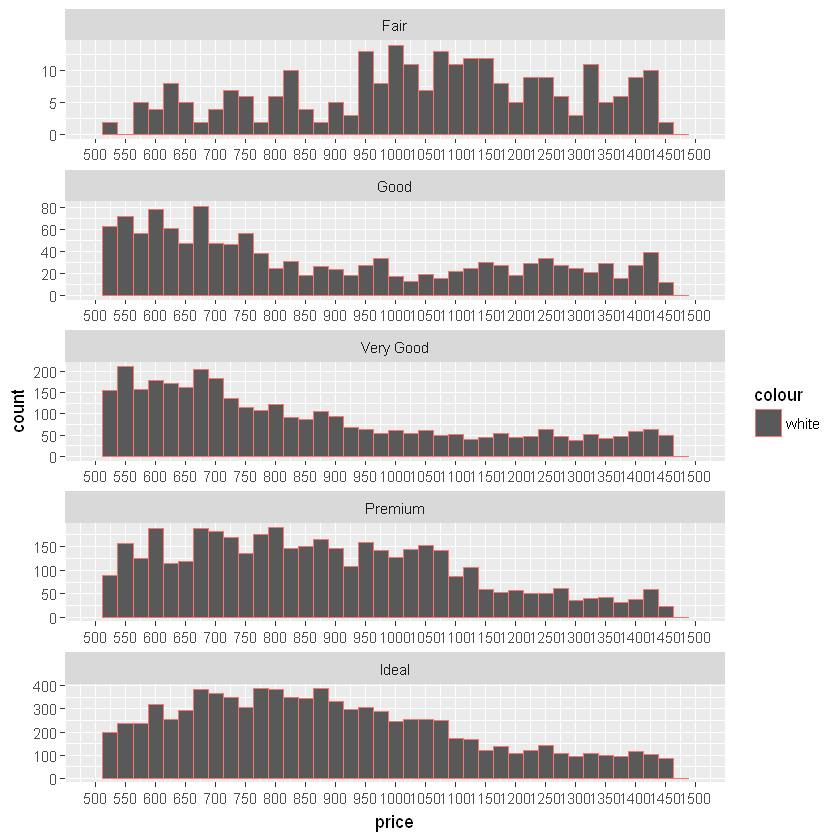

In [54]:
# ?facet_wrap

## I just added one more argument 'scales' in the facet_wrap()

# Break out the histogram of diamond prices by cut.
qplot(data=diamonds, x=price, binwidth = 25, color='white') +
    scale_x_continuous(limits = c(500, 1500), breaks = seq(500, 1500, 50))+
        facet_wrap(~cut, ncol=1, scales='free')

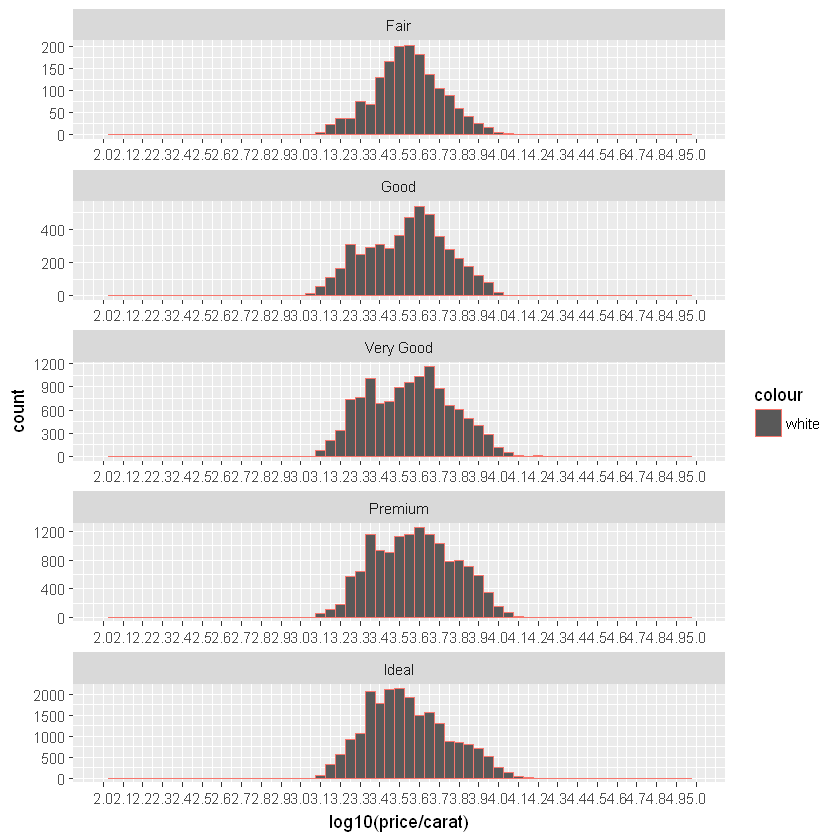

In [64]:
# Create a histogram of price per carat
# and facet it by cut. You can make adjustments
# to the code from the previous exercise to get
# started.

# Adjust the bin width and transform the scale
# of the x-axis using log10.

qplot(data=diamonds, x=log10(price/carat), binwidth = 0.05, color='white') +
    scale_x_continuous(limits = c(2, 5), breaks = seq(2, 5, 0.1))+
        facet_wrap(~cut, ncol=1, scales='free')


#      scale_x_continuous(limits = c(500, 1500), breaks = seq(500, 1500, 50))+
       

# ?qplot

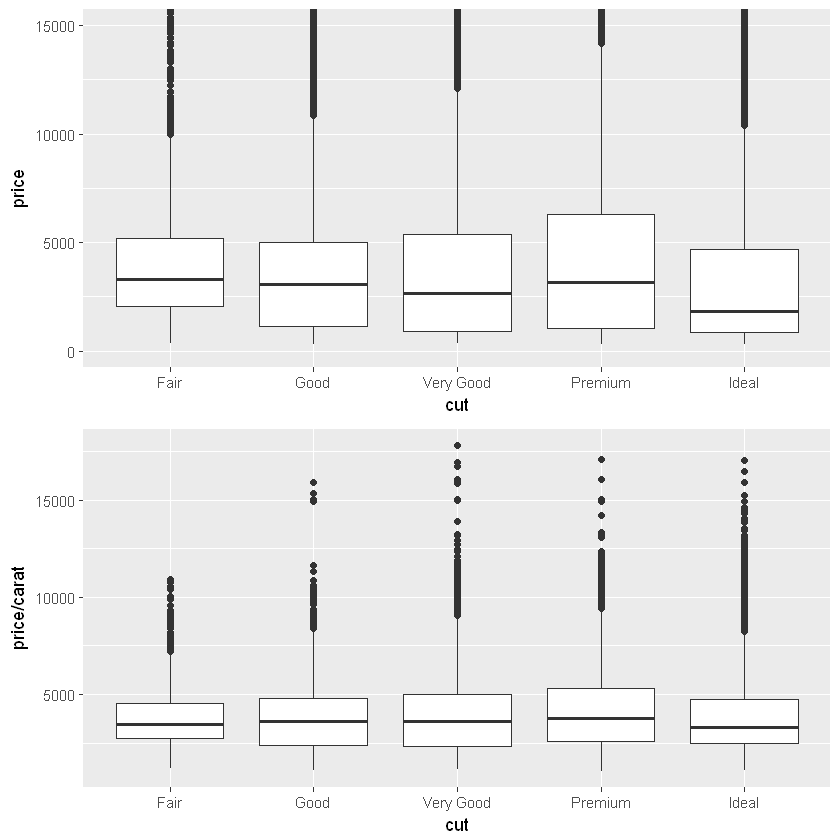

In [6]:
## Boxplot

# Investigate the price of diamonds using box plots,
# numerical summaries, and one of the following categorical
# variables: cut, clarity, or color.

# For boxplots, we use the "y" parameter for the continuous data 
# and the "x" parameter for the categorical data.
library(gridExtra)
q1 = qplot(x=cut, y=price, data=diamonds, geom='boxplot') +
    coord_cartesian(ylim = c(0, 15000))
q2 = qplot(x=cut, y=price/carat, data=diamonds, geom='boxplot') 
   
grid.arrange(q1,q2)


In [72]:
by(diamonds$price, diamonds$color, summary)

diamonds$color: D
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    357     911    1838    3170    4214   18693 
------------------------------------------------------------ 
diamonds$color: E
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     882    1739    3077    4003   18731 
------------------------------------------------------------ 
diamonds$color: F
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    342     982    2344    3725    4868   18791 
------------------------------------------------------------ 
diamonds$color: G
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    354     931    2242    3999    6048   18818 
------------------------------------------------------------ 
diamonds$color: H
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    337     984    3460    4487    5980   18803 
------------------------------------------------------------ 
diamonds$color: I
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1120    3730    5092    7202   1

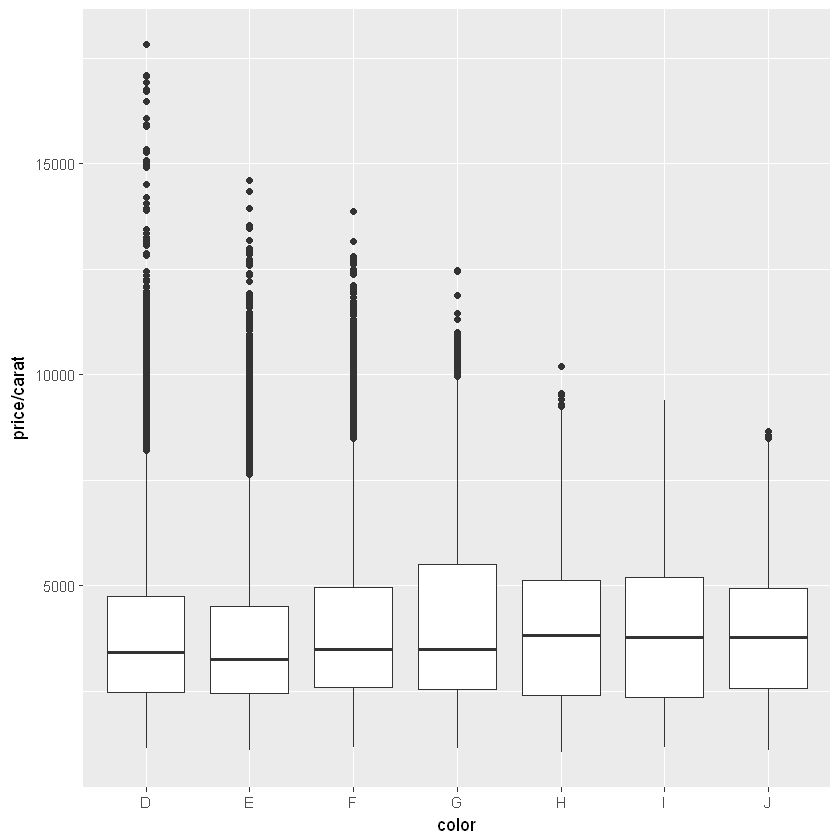

In [73]:
# Investigate the price per carat of diamonds across
# the different colors of diamonds using boxplots.

qplot(x=color, y=price/carat, data=diamonds, geom='boxplot') 

#     coord_cartesian(ylim = c(0, 15000))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


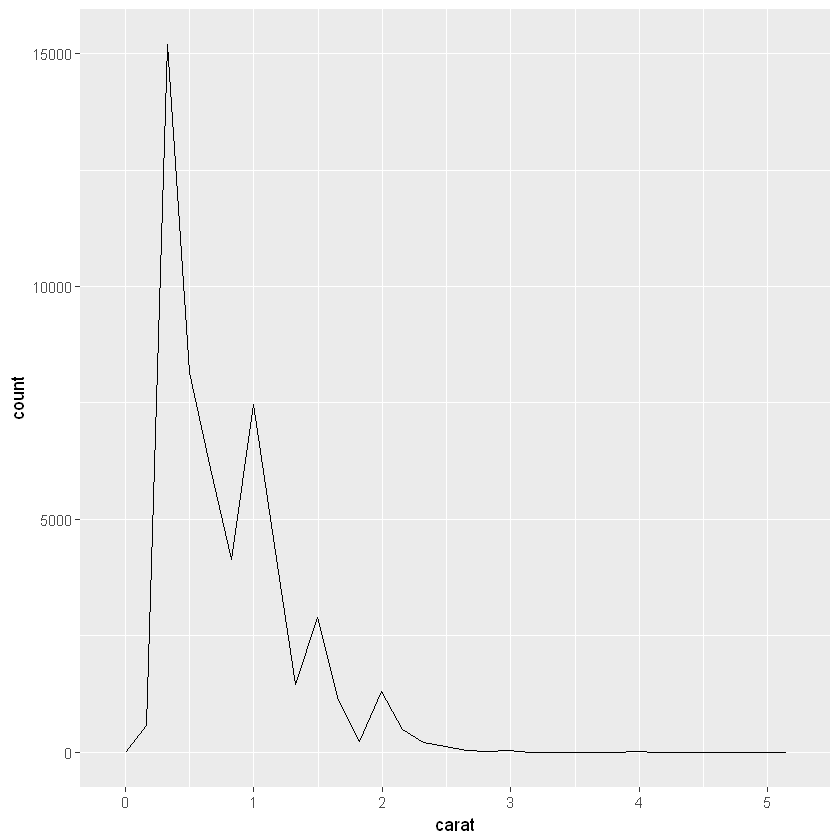

In [88]:
## Frequency polygon

qplot(x=carat, data=diamonds, geom='freqpoly')

#     scale_x_continuous(limits = c(1,2), breaks=seq(1,2,0.1))

Warning message:
"Removed 32 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

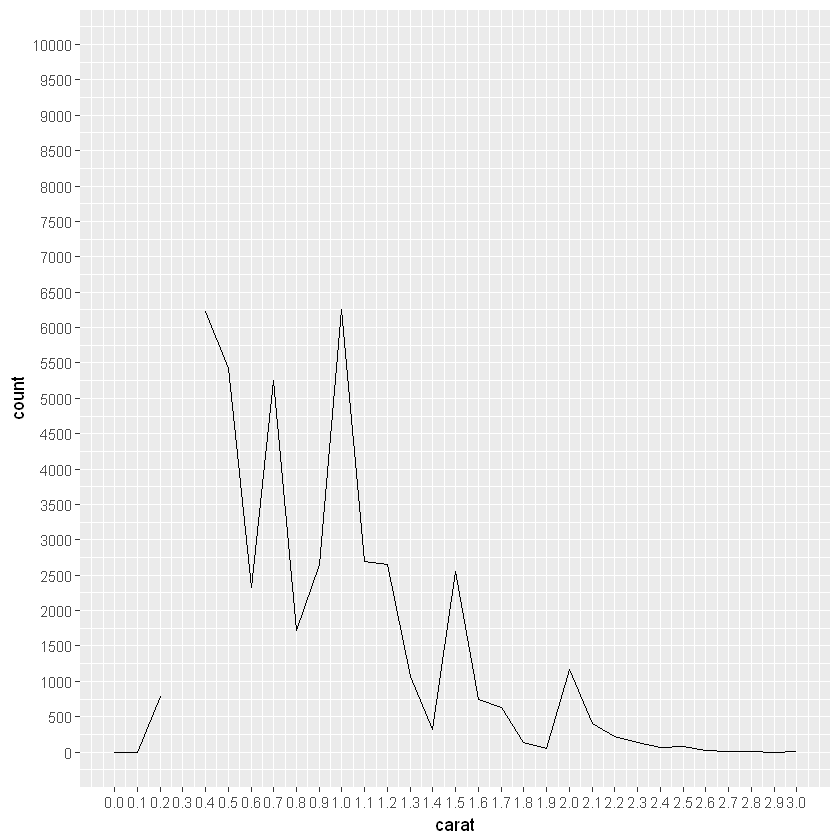

In [94]:
## What carat sizes has count>2000?
## We need to focus on the area of interest

qplot(x=carat, data=diamonds, binwidth=0.1, geom='freqpoly')+
    scale_x_continuous(limits = c(0,3), breaks=seq(0,3,0.1)) +
    scale_y_continuous(limits = c(0,10000), breaks=seq(0,10000,500))


In [86]:
# Data munging or data wrangling can take up much of a data scientist' time. 
# There are two R packages that make these tasks easier in R: tidyr and dplyr.

# tidyr -a package that reshapes the layout of your data

# dplyr - a package that helps you transform tidy, tabular data

[1] 0.2